# US Baby Name

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

## TÌM HIỂU DỮ LIỆU

### 01. Đọc dữ liệu

In [70]:
import pandas as pd
 
data = pd.read_csv('US_Baby_Names.csv')

### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [71]:
data.sample(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
106987,565050,565051,Danely,2014,F,CA,5
683258,3855425,3855426,Zayne,2008,M,NY,7
411717,2264295,2264296,Isabell,2009,F,MA,7
251012,1314240,1314241,Jesus,2006,M,GA,164
33428,246188,246189,Jace,2009,M,AR,44
618581,3473593,3473594,Hayden,2012,M,NJ,38
909943,5073547,5073548,Franz,2013,M,TX,9
771898,4341861,4341862,Makenzie,2010,F,PA,99
300362,1630149,1630150,Jamaya,2007,F,IL,13
758873,4239132,4239133,Jesiah,2009,M,OR,5


### 03. Cho biết kích thước dữ liệu

In [72]:
data.shape
print(data.columns)
print('Số dòng:', data.shape[0])
print('Số cột:', data.shape[1])

Index(['Unnamed: 0', 'Id', 'Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')
Số dòng: 1016395
Số cột: 7


### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [73]:
data.drop(columns=['Id','Unnamed: 0'])

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


### 05. Cho biết số lượng bé trai, bé gái?

In [74]:
data['Gender'].value_counts()


Gender
F    558846
M    457549
Name: count, dtype: int64

### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [75]:
data['Name'].nunique()

17632

### 07. Tên nào xuất hiện ít nhất?

In [76]:
### 07. Tên nào xuất hiện ít nhất?
data['Name'].value_counts()[data['Name'].value_counts() == min(data['Name'].value_counts())]

Name
Natnael      1
Kiril        1
Shamyah      1
Caylyn       1
Tionne       1
            ..
Anaka        1
Montanna     1
Thaddaeus    1
Miroslav     1
Ackley       1
Name: count, Length: 3682, dtype: int64

### 08. Top 10 tên được sử dụng nhiều nhất?

In [77]:
data['Name'].value_counts().head(10)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: count, dtype: int64

## TRỰC QUAN DỮ LIỆU

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

<BarContainer object of 10 artists>

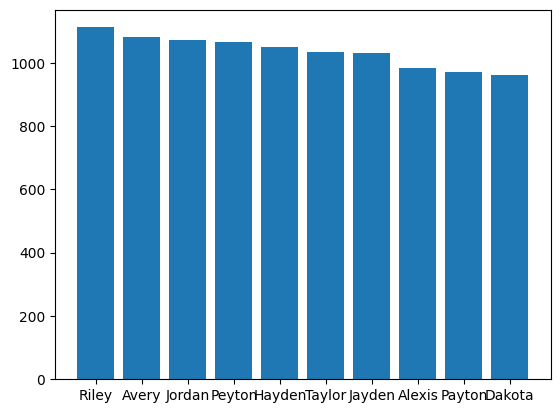

In [78]:
import matplotlib.pyplot as plt
plt.bar(data['Name'].value_counts().head(10).index, data['Name'].value_counts().head(10).values)

# value_counts() return a Series with index as names and values as counts
# x.value_counts().index gives the names
# x.value_counts().values gives the counts

### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

48083 38337 (86420, 7)
49196 39298 (88494, 7)
50851 40952 (91803, 7)
52234 42098 (94332, 7)
52568 42402 (94970, 7)
51987 42622 (94609, 7)
51084 42223 (93307, 7)
50651 41894 (92545, 7)
50722 42302 (93024, 7)
50440 42303 (92743, 7)
51030 43118 (94148, 7)


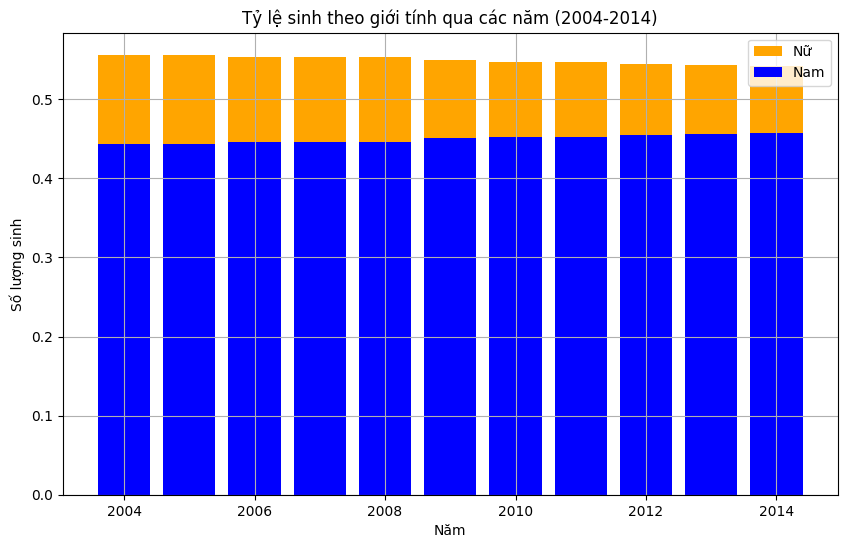

In [79]:
### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

plt.figure(figsize=(10,6))
for year in range(2004, 2015):
    sumPlotData = data[data['Year'] == year]
    plotDataFemale = sumPlotData[sumPlotData['Gender'] == 'F'].value_counts().sum()
    plotDataMale = sumPlotData[sumPlotData['Gender'] == 'M'].value_counts().sum()
    print(plotDataFemale, plotDataMale, sumPlotData.shape)
    plt.bar(year, plotDataFemale/sumPlotData.value_counts().sum(),color='orange')
    plt.bar(year, plotDataMale/sumPlotData.value_counts().sum(),color='blue')

plt.title('Tỷ lệ sinh theo giới tính qua các năm (2004-2014)')
plt.xlabel('Năm')
plt.ylabel('Số lượng sinh')
plt.legend(['Nữ', 'Nam'])
plt.grid()
plt.show()
